In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df_income=pd.read_csv('adult_income.csv')
df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [3]:
df_income.shape

(48842, 15)

In [4]:
df_income.info()
#There are missing values in workclass, occupation, native-country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df_income['class'].value_counts()

<=50K    37155
>50K     11687
Name: class, dtype: int64

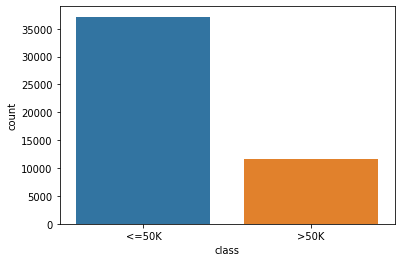

In [6]:
sns.countplot(x=df_income['class'],data=df_income)

In [7]:
df_income.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

In [8]:
df_income['workclass']=df_income['workclass'].fillna(df_income['workclass'].mode()[0])
df_income['occupation']=df_income['occupation'].fillna(df_income['occupation'].mode()[0])
df_income['native-country']=df_income['native-country'].fillna(df_income['native-country'].mode()[0])
#To fill missing values

In [9]:
df_income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
class             0
dtype: int64

In [10]:
#Converting string into integer
le = LabelEncoder()
cols = ['workclass', 'education','marital-status', 'occupation',
       'relationship', 'race', 'sex','native-country','class']
for col in cols:
    df_income[col] = le.fit_transform(df_income[col])

In [11]:
df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,6,77516,9,13,4,0,1,4,1,1,0,2,38,0
1,3,5,83311,9,13,2,3,0,4,1,0,0,0,38,0
2,2,3,215646,11,9,0,5,1,4,1,0,0,2,38,0
3,3,3,234721,1,7,2,5,0,2,1,0,0,2,38,0
4,1,3,338409,9,13,2,9,5,2,0,0,0,2,4,0


In [12]:
df_income.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.771078,3.099668,1.896641e+05,10.288420,10.078089,2.618750,6.152819,1.443287,3.668052,0.668482,0.200319,0.114942,1.950698,36.433664,0.239282
std,1.295378,1.110810,1.056040e+05,3.874492,2.570973,1.507703,3.968837,1.602151,0.845986,0.470764,0.746182,0.556924,0.897038,6.031536,0.426649
min,0.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.175505e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2.000000,38.000000,0.000000
50%,2.000000,3.000000,1.781445e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,2.000000,38.000000,0.000000
75%,3.000000,3.000000,2.376420e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,2.000000,38.000000,0.000000
max,4.000000,7.000000,1.490400e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,4.000000,4.000000,4.000000,40.000000,1.000000


In [13]:
df_income_corr=df_income.corr()
df_income_corr
#Class doesn't have strong relationship with any attribute

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
age,1.000000,0.040445,-0.076674,-0.020467,0.034859,-0.291070,-0.004971,-0.261953,0.027661,0.090898,0.124929,0.060768,0.115442,-0.003473,0.248931
workclass,0.040445,1.000000,-0.026519,0.005219,0.007333,-0.020870,0.009841,-0.056073,0.053923,0.066672,0.016744,0.007727,0.029507,-0.004829,-0.000511
fnlwgt,-0.076674,-0.026519,1.000000,-0.022570,-0.038761,0.029851,-0.002253,0.009092,-0.027062,0.027739,-0.004681,-0.004643,-0.008893,-0.058534,-0.006339
education,-0.020467,0.005219,-0.022570,1.000000,0.359668,-0.037417,-0.035126,-0.010758,0.013250,-0.027041,0.030850,0.017220,0.058560,0.075339,0.080091
education-num,0.034859,0.007333,-0.038761,0.359668,1.000000,-0.069992,0.072706,-0.090534,0.029239,0.009328,0.160389,0.084891,0.146786,0.090137,0.332613
marital-status,-0.291070,-0.020870,0.029851,-0.037417,-0.069992,1.000000,0.030445,0.187800,-0.070104,-0.127479,-0.067790,-0.033569,-0.197515,-0.017919,-0.199072
occupation,-0.004971,0.009841,-0.002253,-0.035126,0.072706,0.030445,1.000000,-0.034964,-0.005210,0.042579,0.014310,0.010690,-0.026472,-0.001577,0.032550
relationship,-0.261953,-0.056073,0.009092,-0.010758,-0.090534,0.187800,-0.034964,1.000000,-0.117041,-0.579797,-0.085617,-0.057266,-0.261854,-0.006999,-0.253214
race,0.027661,0.053923,-0.027062,0.013250,0.029239,-0.070104,-0.005210,-0.117041,1.000000,0.086734,0.023865,0.018493,0.039193,0.117553,0.070934
sex,0.090898,0.066672,0.027739,-0.027041,0.009328,-0.127479,0.042579,-0.579797,0.086734,1.000000,0.070443,0.046633,0.238820,-0.002453,0.214628


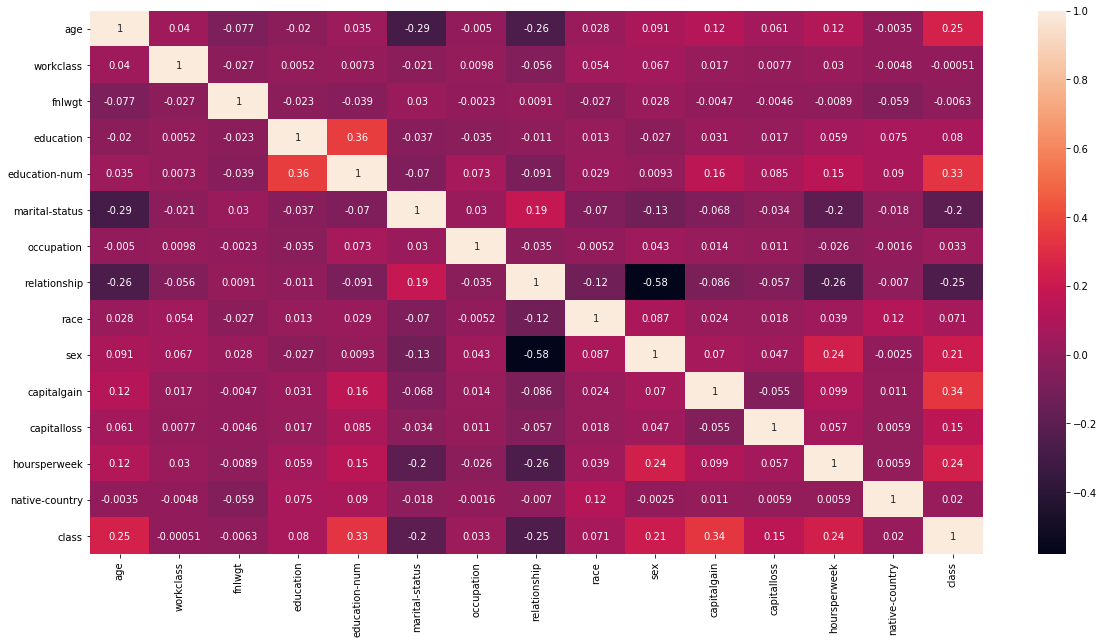

In [14]:
#Correlation between attributes
plt.figure(figsize=(20, 10))
sns.heatmap(df_income_corr, annot=True)
plt.show()

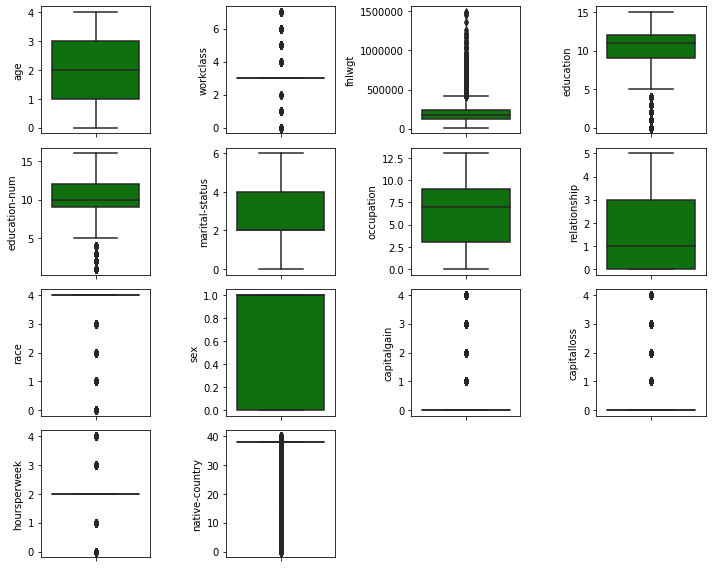

In [15]:
col_list=df_income.iloc[:,0:14].columns.values
plt.figure(figsize=(10,8))
for i in range(0, len(col_list)):                                      
    plt.subplot(4,4,i+1)
    sns.boxplot(df_income[col_list[i]], color="green", orient='v')
    plt.tight_layout()
#Boxplot to check outliers

In [16]:
df_income1=df_income.iloc[:,0:14]
from scipy.stats import zscore
z_score=abs(zscore(df_income1))
print(df_income.shape)
df_income1_final=df_income1.loc[(z_score<3).all(axis=1)]                  
print(df_income1_final.shape)
#to quantify the outliers

(48842, 15)
(41453, 14)


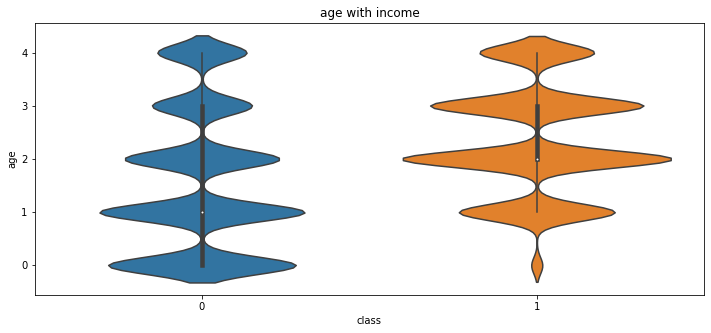

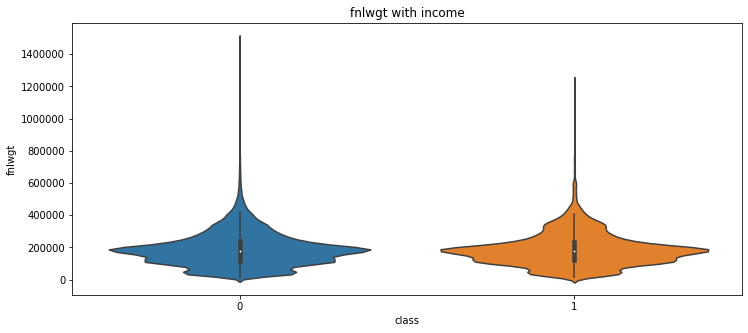

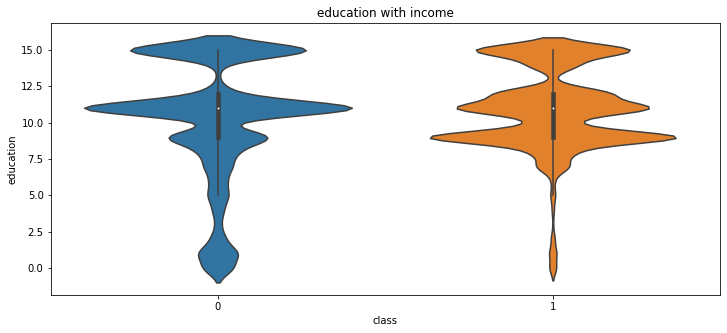

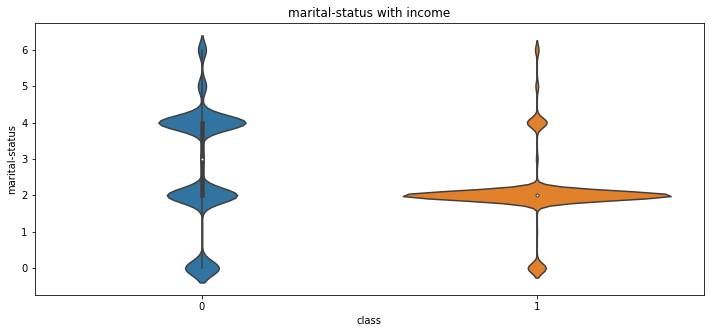

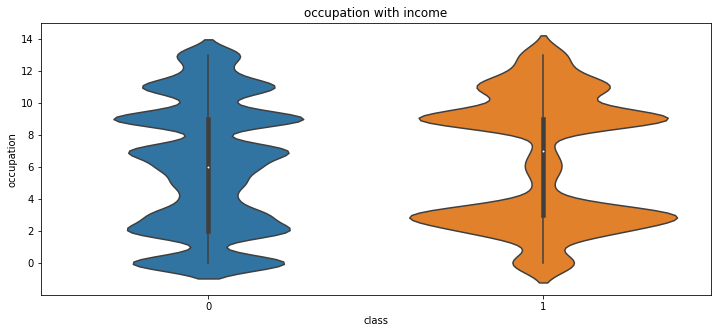

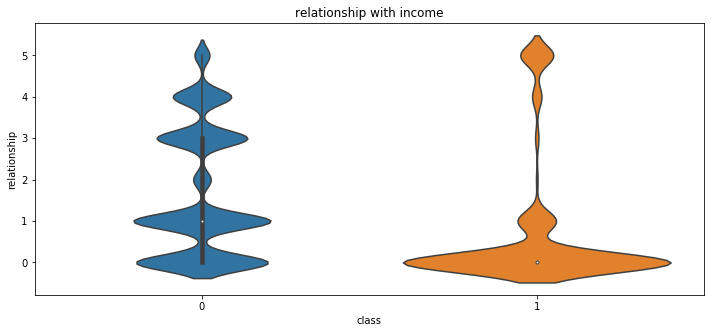

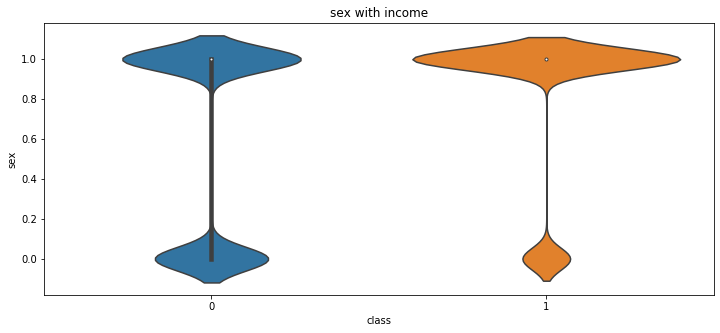

In [17]:
#Violoin Plot
cols = ['age', 'fnlwgt', 'education', 'marital-status', 'occupation', 'relationship', 'sex']
for col in cols:
    plt.figure(figsize=(12, 5))
    plt.title(str(col) +' with' + ' income')
    sns.violinplot(x=df_income['class'], y=df_income[col], data=df_income)
    plt.show()

In [18]:
#Splitting of data
x = df_income.iloc[:,:14]
y=df_income['class']

In [19]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [20]:
#Testing the models at random state 42 along with their accuracy score
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.20)
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
#After the testing several models, we have found that LogisticRegression and KNeighborsClassifier is giving highest accuracy score at random state 42.

0.8270037874910431
0.7937352850854744
0.826696693622684
0.8200429931415703


In [22]:
#Now we are checking, at what random state, both models will have highest accuracy score
max_a_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    ac_scr=accuracy_score(y_test,y_pred)
    print("accuracy score corresponding to random state: ",r_state," is: ",accuracy_score)
    if ac_scr>max_a_score:
        max_a_score=ac_scr
        final_r_state=r_state
print()
print()
print('max accuracy score corresponding to ',final_r_state," is ",max_a_score)
#At random state 100, LogisticRegression model is giving 0.8312007370252841 accuracy score

accuracy score corresponding to random state:  42  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  43  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  44  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  45  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  46  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  47  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  48  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  49  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  50  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  51  is:  <functio

In [23]:
max_a_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    ac_scr=accuracy_score(y_test,y_pred)
    print("accuracy score corresponding to random state: ",r_state," is: ",accuracy_score)
    if ac_scr>max_a_score:
        max_a_score=ac_scr
        final_r_state=r_state
print()
print()
print('max accuracy score corresponding to ',final_r_state," is ",max_a_score)
#At random state 60, KNeighborsClassifier model is giving 0.8375473436380387 accuracy score

accuracy score corresponding to random state:  42  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  43  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  44  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  45  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  46  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  47  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  48  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  49  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  50  is:  <function accuracy_score at 0x000000BC536A4798>
accuracy score corresponding to random state:  51  is:  <functio

In [24]:
#Cross Validation of KNeighborsClassifier
cross_val_score(KNeighborsClassifier(),x,y,cv=5,scoring='accuracy').mean()
#It is below the accuracy score, so it is acceptable model

0.8302076597577672

In [26]:
#Implementing KNeighborsClassifier model at random state 60
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=0.20)
knn=KNeighborsClassifier()            
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8375473436380387


In [27]:
#Saving the model
import joblib
filename = 'Project11_model.sav'
joblib.dump(knn, filename)

['Project11_model.sav']